importing global variables from another files

In [1]:
from global_variable import *

In [2]:
data_rate=data_rate

In [3]:
data_rate

50

In [4]:
import random
import networkx as nx
import math
import itertools    
import matplotlib.pyplot as plt


this class is created to position the sensors randomly in the range of 0-500

In [5]:
class SensorNode():
    posX=0
    posY=0
    data_rate=data_rate
    transmission_range=transmission_range

    def __init__(self):
        self.posX
        self.posY
        self.data_rate
        self.transmission_range
    
    def get_pose_node(self):
        self.posX=random.randrange(500)
        self.posY=random.randrange(500)
        self.data_rate
        self.transmission_range
        return self.posX,self.posY

a list of sensor is created in which sensor position objects are stored

In [6]:
sensor=[]


In [7]:
number_of_sensor

10

In [8]:
for i in range(number_of_sensor):
    sensor.append(SensorNode().get_pose_node())

In [9]:
sensor=sorted(sensor)

In [10]:
import numpy as np

This function calulate the possible drone positions (pdp) in the grid which is of size 500x500

In [11]:
def calculate_Pdp_positions(length_of_grid,transmission_range):
    pdp_positions={}
    k=0
    for c_1 in np.arange(length_of_grid/(transmission_range*math.sqrt(2))):
        for c_2 in np.arange(length_of_grid/(transmission_range*math.sqrt(2))):
            pdp_positions[k]=(c_1*transmission_range*math.sqrt(2),c_2*transmission_range*math.sqrt(2))
            k=k+1
    return pdp_positions
            
    

        

from here the connectivity graphs is made for each pdp position

In [12]:
pdp_positions=calculate_Pdp_positions(length_of_grid,transmission_range)

In [13]:
pdp_positions

{0: (0.0, 0.0),
 1: (0.0, 282.842712474619),
 2: (282.842712474619, 0.0),
 3: (282.842712474619, 282.842712474619)}

In [14]:
G=nx.Graph()

this function calculates the distance between two possible drone positions (pdps)

In [15]:
def distance(points,i,j):
    x=points[i][0]-points[j][0]
    y=points[i][1]-points[j][1]
    return math.sqrt(x*x+y*y)

An adjacent_matrix is created ,the adjacent matrix gives the distance between each pdps

In [16]:
adjacent_matrix=np.zeros((4,4))
for u in range(len(pdp_positions)):
    for v in range(len(pdp_positions)):
        wt=distance(pdp_positions,u,v)
        adjacent_matrix[u][v]=wt
        G.add_edge(u,v,weight=wt)
        #G.add_node()

In [17]:
adjacent_matrix

array([[  0.        , 282.84271247, 282.84271247, 400.        ],
       [282.84271247,   0.        , 400.        , 282.84271247],
       [282.84271247, 400.        ,   0.        , 282.84271247],
       [400.        , 282.84271247, 282.84271247,   0.        ]])

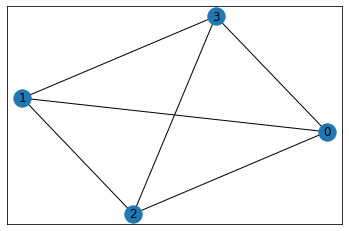

In [18]:
nx.draw_networkx(G)

In [19]:
labels = nx.get_edge_attributes(G,'weight')


In [20]:
pos=nx.get_node_attributes(G,'pos')


In [21]:
labels

{(0, 0): 0.0,
 (0, 1): 282.842712474619,
 (0, 2): 282.842712474619,
 (0, 3): 400.0,
 (1, 1): 0.0,
 (1, 2): 400.0,
 (1, 3): 282.842712474619,
 (2, 2): 0.0,
 (2, 3): 282.842712474619,
 (3, 3): 0.0}

In [22]:
G.number_of_nodes()

4

In [23]:

import matplotlib.pyplot as plt


#to visualize how the points are scattered on the graph blue represents the pdps and red represents the sensor points

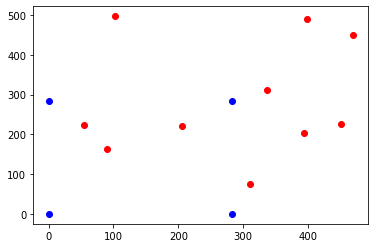

In [24]:

for i in range(len(sensor)):
    plt.scatter(sensor[i][0],sensor[i][1],c='r')
for j in range(len(pdp_positions)):
    plt.scatter(pdp_positions[j][0],pdp_positions[j][1],c='b')

#A new graph is created below ,firstly the sensor nodes are added in tehe graph k

In [25]:
K=nx.Graph()

In [26]:
for i in range(len(sensor)):
    K.add_node('sensor{}'.format(i),pos=sensor[i])

Now after the nodes are added then the edge between the nodes are added

In [27]:
for i in range(len(sensor)):
    for j in range(len(sensor)):
        K.add_edge("sensor{}".format(i),"sensor{}".format(j))

In [30]:
#this function is getting the the coordinate points of sensor and Graph as the argument value
#
def calulate_distance_between_each_sensors_and_assign_weight(points,K):
    distance_sensors={}
    M=K
    k=0
    edge_weight=1
    for i in range(len(points)):
        for j in range(len(points)):
            euclidean_distance=distance(points,i,j)
            if i!=j:
                if euclidean_distance<=transmission_range:
                    M["sensor{}".format(i)]["sensor{}".format(j)]['weight']=1
                    
                    distance_sensors[k]=((points[i][0],points[i][1]),(points[j][0],points[j][1])),(euclidean_distance),(edge_weight)
                else:
                    M["sensor{}".format(i)]["sensor{}".format(j)]['weight']=100
                    distance_sensors[k]=((points[i][0],points[i][1]),(points[j][0],points[j][1])),(euclidean_distance)
            k=k+1
    return distance_sensors,M

here the 'L' is a graph containing the sensor nodes and edge weights between the sensor

In [31]:
euclidean_distance_between_sensor,L=calulate_distance_between_each_sensors_and_assign_weight(sensor,K)

In [32]:
euclidean_distance_between_sensor

{1: (((54, 224), (90, 162)), 71.69379331573968, 1),
 2: (((54, 224), (103, 497)), 277.3625785862253),
 3: (((54, 224), (205, 222)), 151.0132444522665, 1),
 4: (((54, 224), (310, 74)), 296.70861126701396),
 5: (((54, 224), (337, 311)), 296.0709374457412),
 6: (((54, 224), (393, 204)), 339.5894580224775),
 7: (((54, 224), (398, 489)), 434.2361108889955),
 8: (((54, 224), (451, 227)), 397.0113348507823),
 9: (((54, 224), (469, 450)), 472.547352124631),
 10: (((90, 162), (54, 224)), 71.69379331573968, 1),
 12: (((90, 162), (103, 497)), 335.2521439155908),
 13: (((90, 162), (205, 222)), 129.71121771072848, 1),
 14: (((90, 162), (310, 74)), 236.9472515139182),
 15: (((90, 162), (337, 311)), 288.4614358974177),
 16: (((90, 162), (393, 204)), 305.8970415025291),
 17: (((90, 162), (398, 489)), 449.2137575809539),
 18: (((90, 162), (451, 227)), 366.80512537313325),
 19: (((90, 162), (469, 450)), 476.0094536876342),
 20: (((103, 497), (54, 224)), 277.3625785862253),
 21: (((103, 497), (90, 162)),

In above output the first and second tuples are the coordinate points of  the sensors and another item in the tuple is the distance between the sensor points. If the distance between the sensor point is less than the transmission range then we assign the edge value as '1'

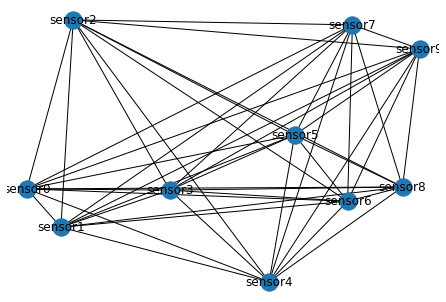

In [33]:
nx.draw(L,nx.get_node_attributes(L,'pos'),with_labels=True)

we have added the sensor in the previous graph, now we will add the pdps in the previously sensor nodes added networkx graph

In [34]:
for i in range(len(pdp_positions)):
    L.add_node('pdp{}'.format(i),pos=pdp_positions[i])

In [35]:
for i in range(len(pdp_positions)):
    for j in range(len(sensor)):
        L.add_edge("pdp{}".format(i),"sensor{}".format(j))

In [36]:
def distance_pdp_sensors(pdp_positions,sensor,u,v):
    x=pdp_positions[u][0]-sensor[v][0]
    y=pdp_positions[u][1]-sensor[v][1]
    return math.sqrt(x*x+y*y)    

In [37]:
def calculate_distance_between_each_pdp_and_sensor(pdp_positions,sensor,K):
    J=K
    distance_pdp_each_sensor={}
    k=0
    weight=1
    for u in range(len(pdp_positions)):
        for v in range(len(sensor)):
            euclidean_distance_between_pdp_sensor=distance_pdp_sensors(pdp_positions,sensor,u,v)
            if euclidean_distance_between_pdp_sensor<=transmission_range:
                J["pdp{}".format(u)]["sensor{}".format(v)]['weight']=1
                distance_pdp_each_sensor[k]=((pdp_positions[u][0],pdp_positions[u][1]),(sensor[v][0],sensor[v][1])),(euclidean_distance_between_pdp_sensor),(weight)
            else:
                J["pdp{}".format(u)]["sensor{}".format(v)]['weight']=100
                distance_pdp_each_sensor[k]=((pdp_positions[u][0],pdp_positions[u][1]),(sensor[v][0],sensor[v][1])),(euclidean_distance_between_pdp_sensor)
            k=k+1
    return distance_pdp_each_sensor,J
            
            
            

In [38]:
distance_between_pdp_to_each_sensor,N=calculate_distance_between_each_pdp_and_sensor(pdp_positions,sensor,L)

In [39]:
distance_between_pdp_to_each_sensor

{0: (((0.0, 0.0), (54, 224)), 230.41701326073994),
 1: (((0.0, 0.0), (90, 162)), 185.32134253776601, 1),
 2: (((0.0, 0.0), (103, 497)), 507.56083379236424),
 3: (((0.0, 0.0), (205, 222)), 302.1737910540886),
 4: (((0.0, 0.0), (310, 74)), 318.709899438345),
 5: (((0.0, 0.0), (337, 311)), 458.5738762729512),
 6: (((0.0, 0.0), (393, 204)), 442.7922763554035),
 7: (((0.0, 0.0), (398, 489)), 630.4958366238433),
 8: (((0.0, 0.0), (451, 227)), 504.9059318328514),
 9: (((0.0, 0.0), (469, 450)), 649.9699993076604),
 10: (((0.0, 282.842712474619), (54, 224)), 79.8652916564554, 1),
 11: (((0.0, 282.842712474619), (90, 162)), 150.6750183614505, 1),
 12: (((0.0, 282.842712474619), (103, 497)), 237.63910410584512),
 13: (((0.0, 282.842712474619), (205, 222)), 213.83834001710068),
 14: (((0.0, 282.842712474619), (310, 74)), 373.78506999846365),
 15: (((0.0, 282.842712474619), (337, 311)), 338.17426401307796),
 16: (((0.0, 282.842712474619), (393, 204)), 400.8306042586512),
 17: (((0.0, 282.8427124746

In [109]:
colormap=[]
for i,j in N.nodes.data():
    for m,n in j.items():
        if n in sensor:
            colormap.append('b')
        else:
            colormap.append('r')

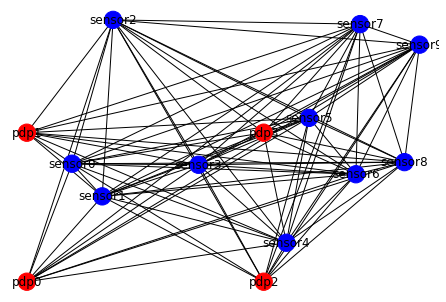

In [110]:
nx.draw(N,nx.get_node_attributes(N, 'pos'),with_labels=True,node_color=colormap)

In [41]:
nx.get_node_attributes(N, 'pos')

{'sensor0': (54, 224),
 'sensor1': (90, 162),
 'sensor2': (103, 497),
 'sensor3': (205, 222),
 'sensor4': (310, 74),
 'sensor5': (337, 311),
 'sensor6': (393, 204),
 'sensor7': (398, 489),
 'sensor8': (451, 227),
 'sensor9': (469, 450),
 'pdp0': (0.0, 0.0),
 'pdp1': (0.0, 282.842712474619),
 'pdp2': (282.842712474619, 0.0),
 'pdp3': (282.842712474619, 282.842712474619)}

In [42]:
N.nodes()

NodeView(('sensor0', 'sensor1', 'sensor2', 'sensor3', 'sensor4', 'sensor5', 'sensor6', 'sensor7', 'sensor8', 'sensor9', 'pdp0', 'pdp1', 'pdp2', 'pdp3'))

In [43]:
N.edges.data()

EdgeDataView([('sensor0', 'sensor0', {}), ('sensor0', 'sensor1', {'weight': 1}), ('sensor0', 'sensor2', {'weight': 100}), ('sensor0', 'sensor3', {'weight': 1}), ('sensor0', 'sensor4', {'weight': 100}), ('sensor0', 'sensor5', {'weight': 100}), ('sensor0', 'sensor6', {'weight': 100}), ('sensor0', 'sensor7', {'weight': 100}), ('sensor0', 'sensor8', {'weight': 100}), ('sensor0', 'sensor9', {'weight': 100}), ('sensor0', 'pdp0', {'weight': 100}), ('sensor0', 'pdp1', {'weight': 1}), ('sensor0', 'pdp2', {'weight': 100}), ('sensor0', 'pdp3', {'weight': 100}), ('sensor1', 'sensor1', {}), ('sensor1', 'sensor2', {'weight': 100}), ('sensor1', 'sensor3', {'weight': 1}), ('sensor1', 'sensor4', {'weight': 100}), ('sensor1', 'sensor5', {'weight': 100}), ('sensor1', 'sensor6', {'weight': 100}), ('sensor1', 'sensor7', {'weight': 100}), ('sensor1', 'sensor8', {'weight': 100}), ('sensor1', 'sensor9', {'weight': 100}), ('sensor1', 'pdp0', {'weight': 1}), ('sensor1', 'pdp1', {'weight': 1}), ('sensor1', 'pdp2

In [44]:
nx.get_edge_attributes(N,"weight")

{('sensor0', 'sensor1'): 1,
 ('sensor0', 'sensor2'): 100,
 ('sensor0', 'sensor3'): 1,
 ('sensor0', 'sensor4'): 100,
 ('sensor0', 'sensor5'): 100,
 ('sensor0', 'sensor6'): 100,
 ('sensor0', 'sensor7'): 100,
 ('sensor0', 'sensor8'): 100,
 ('sensor0', 'sensor9'): 100,
 ('sensor0', 'pdp0'): 100,
 ('sensor0', 'pdp1'): 1,
 ('sensor0', 'pdp2'): 100,
 ('sensor0', 'pdp3'): 100,
 ('sensor1', 'sensor2'): 100,
 ('sensor1', 'sensor3'): 1,
 ('sensor1', 'sensor4'): 100,
 ('sensor1', 'sensor5'): 100,
 ('sensor1', 'sensor6'): 100,
 ('sensor1', 'sensor7'): 100,
 ('sensor1', 'sensor8'): 100,
 ('sensor1', 'sensor9'): 100,
 ('sensor1', 'pdp0'): 1,
 ('sensor1', 'pdp1'): 1,
 ('sensor1', 'pdp2'): 100,
 ('sensor1', 'pdp3'): 100,
 ('sensor2', 'sensor3'): 100,
 ('sensor2', 'sensor4'): 100,
 ('sensor2', 'sensor5'): 100,
 ('sensor2', 'sensor6'): 100,
 ('sensor2', 'sensor7'): 100,
 ('sensor2', 'sensor8'): 100,
 ('sensor2', 'sensor9'): 100,
 ('sensor2', 'pdp0'): 100,
 ('sensor2', 'pdp1'): 100,
 ('sensor2', 'pdp2'): 

Here the shortest path between each pdp and sensor is calculated using dijkstra's algorithm

In [45]:
k=0
shortest_path={}
for i in range(len(pdp_positions)):
    for j in range(len(sensor)):
        shortest_path[k]=nx.shortest_path(N,source='pdp{}'.format(i),target='sensor{}'.format(j),weight='weight',method='dijkstra')
        k=k+1
        

In [46]:
shortest_path

{0: ['pdp0', 'sensor1', 'sensor0'],
 1: ['pdp0', 'sensor1'],
 2: ['pdp0', 'sensor2'],
 3: ['pdp0', 'sensor1', 'sensor3'],
 4: ['pdp0', 'sensor1', 'sensor3', 'sensor4'],
 5: ['pdp0', 'sensor1', 'sensor3', 'sensor5'],
 6: ['pdp0', 'sensor1', 'sensor3', 'sensor6'],
 7: ['pdp0', 'sensor1', 'sensor3', 'sensor5', 'sensor7'],
 8: ['pdp0', 'sensor1', 'sensor3', 'sensor5', 'sensor8'],
 9: ['pdp0', 'sensor1', 'sensor3', 'sensor5', 'sensor9'],
 10: ['pdp1', 'sensor0'],
 11: ['pdp1', 'sensor1'],
 12: ['pdp1', 'sensor2'],
 13: ['pdp1', 'sensor0', 'sensor3'],
 14: ['pdp1', 'sensor0', 'sensor3', 'sensor4'],
 15: ['pdp1', 'sensor0', 'sensor3', 'sensor5'],
 16: ['pdp1', 'sensor0', 'sensor3', 'sensor6'],
 17: ['pdp1', 'sensor0', 'sensor3', 'sensor5', 'sensor7'],
 18: ['pdp1', 'sensor0', 'sensor3', 'sensor5', 'sensor8'],
 19: ['pdp1', 'sensor0', 'sensor3', 'sensor5', 'sensor9'],
 20: ['pdp2', 'sensor4', 'sensor3', 'sensor0'],
 21: ['pdp2', 'sensor4', 'sensor3', 'sensor1'],
 22: ['pdp2', 'sensor2'],
 23: 

In [47]:
N.nodes()

NodeView(('sensor0', 'sensor1', 'sensor2', 'sensor3', 'sensor4', 'sensor5', 'sensor6', 'sensor7', 'sensor8', 'sensor9', 'pdp0', 'pdp1', 'pdp2', 'pdp3'))

In [48]:
pos_list=nx.get_node_attributes(N,'pos')

In [49]:
pos_list

{'sensor0': (54, 224),
 'sensor1': (90, 162),
 'sensor2': (103, 497),
 'sensor3': (205, 222),
 'sensor4': (310, 74),
 'sensor5': (337, 311),
 'sensor6': (393, 204),
 'sensor7': (398, 489),
 'sensor8': (451, 227),
 'sensor9': (469, 450),
 'pdp0': (0.0, 0.0),
 'pdp1': (0.0, 282.842712474619),
 'pdp2': (282.842712474619, 0.0),
 'pdp3': (282.842712474619, 282.842712474619)}

as we needed the weight of each pdp so each pdp connected to all the sensor is grouped below

In [59]:
x={}
y={}
for i in range(len(pdp_positions)):
    x[i]=[value for value in shortest_path.values() if value [0]=='pdp{}'.format(i)]
    y[i]=[len(value)-1 for value in shortest_path.values() if value[0]=='pdp{}'.format(i)]

as weight is calculated by formulat 

In [61]:
y

{0: [2, 1, 1, 2, 3, 3, 3, 4, 4, 4],
 1: [1, 1, 1, 2, 3, 3, 3, 4, 4, 4],
 2: [3, 3, 1, 2, 1, 3, 2, 4, 3, 4],
 3: [2, 2, 1, 1, 2, 1, 1, 2, 1, 2]}

In [52]:

values1={}
counts={}
for (keys,values) in y.items():
    values1[keys],counts[keys]=np.unique(values, return_counts=True)
   

In [53]:
values1

{0: array([1, 2, 3, 4]),
 1: array([1, 2, 3, 4]),
 2: array([1, 2, 3, 4]),
 3: array([1, 2])}

In [54]:
counts

{0: array([2, 2, 3, 3], dtype=int64),
 1: array([3, 1, 3, 3], dtype=int64),
 2: array([2, 2, 4, 2], dtype=int64),
 3: array([5, 5], dtype=int64)}

In [55]:
def calculate_weight(values,hops):
    weight_of_pdp={}
    for i in range(len(values)):
        weight=0
        for j in range(len(values[i])):
            print(values[i][j])
            print(hops[i][j])
            print('***')
            weight=weight+hops[i][j]/values[i][j]
        weight_of_pdp[i]=weight
    return weight_of_pdp
    

In [112]:
weight=calculate_weight(values1,counts)

1
2
***
2
2
***
3
3
***
4
3
***
1
3
***
2
1
***
3
3
***
4
3
***
1
2
***
2
2
***
3
4
***
4
2
***
1
5
***
2
5
***


In [113]:
weight

{0: 4.75, 1: 5.25, 2: 4.833333333333333, 3: 7.5}

###function to add weight attribute for each pdp###

In [122]:
def add_weight_to_pdp(N_graph,weight):
    for i in range(len(pdp_positions)):
        N_graph.nodes["pdp{}".format(i)]["Pdp_weight"]=[weight[i]]

In [123]:
add_weight_to_pdp(N,weight)

In [125]:
N.nodes.data()

NodeDataView({'sensor0': {'pos': (54, 224)}, 'sensor1': {'pos': (90, 162)}, 'sensor2': {'pos': (103, 497)}, 'sensor3': {'pos': (205, 222)}, 'sensor4': {'pos': (310, 74)}, 'sensor5': {'pos': (337, 311)}, 'sensor6': {'pos': (393, 204)}, 'sensor7': {'pos': (398, 489)}, 'sensor8': {'pos': (451, 227)}, 'sensor9': {'pos': (469, 450)}, 'pdp0': {'pos': (0.0, 0.0), 'Pdp_weight': [4.75]}, 'pdp1': {'pos': (0.0, 282.842712474619), 'Pdp_weight': [5.25]}, 'pdp2': {'pos': (282.842712474619, 0.0), 'Pdp_weight': [4.833333333333333]}, 'pdp3': {'pos': (282.842712474619, 282.842712474619), 'Pdp_weight': [7.5]}})